In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

import os
import sys

# Dynamically add path to the model folder (works even with space in folder name)
current_dir = os.path.dirname(os.path.abspath("__file__"))
model_path = os.path.abspath(os.path.join(current_dir, "../model"))
sys.path.append(model_path)

from GradientBoostingClassifier import GradientBoostingClassifier


In [5]:
# Load dataset
df = pd.read_csv("../my_data.csv")
df.head()

,feature_0,feature_1,feature_2,feature_3,feature_4,target
0,0.203464,-1.606446,2.046468,0.129853,-2.421642,1
1,0.622850,-0.450065,0.067350,-1.010138,0.864347,0
2,-1.214189,-1.006017,-4.233589,-0.036573,-0.278435,0
3,0.232050,-0.471038,-2.628754,-0.374400,-0.557873,0
4,0.074095,1.502357,1.388774,0.847465,-0.804174,1


In [7]:
X = df.drop("target", axis=1).values
y = df["target"].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
model = GradientBoostingClassifier(n_estimators=50, learning_rate=0.1, max_depth=1)
model.fit(X_train, y_train)

In [11]:
y_pred = model.predict(X_test)

acc = accuracy_score(y_test, y_pred)
print(f"Accuracy: {acc:.4f}")
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))

Accuracy: 0.9000

Classification Report:

              precision    recall  f1-score   support

           0       0.91      0.91      0.91        11
           1       0.89      0.89      0.89         9

    accuracy                           0.90        20
   macro avg       0.90      0.90      0.90        20
weighted avg       0.90      0.90      0.90        20



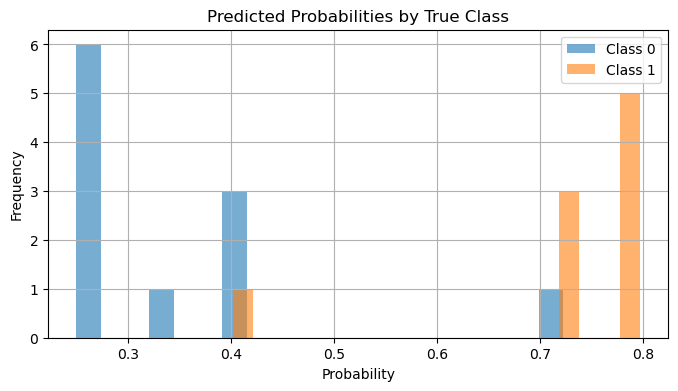

In [13]:
probs = model.predict_proba(X_test)

plt.figure(figsize=(8, 4))
plt.hist(probs[y_test == 0], bins=20, alpha=0.6, label="Class 0")
plt.hist(probs[y_test == 1], bins=20, alpha=0.6, label="Class 1")
plt.title("Predicted Probabilities by True Class")
plt.xlabel("Probability")
plt.ylabel("Frequency")
plt.legend()
plt.grid(True)
plt.show()